In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_csv('Iris.csv')

In [63]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.drop('Id', axis = 1, inplace = True)

In [92]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

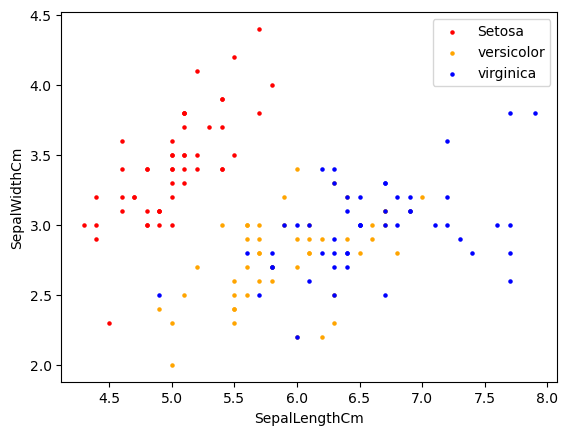

In [23]:
#EDA

fig = df[df.Species == 'Iris-setosa'].plot.scatter(x = 'SepalLengthCm' , y = 'SepalWidthCm' , color = 'red' , s = 5 , label = 'Setosa')
df[df.Species == 'Iris-versicolor'].plot.scatter(x = 'SepalLengthCm' , y = 'SepalWidthCm' , color = 'orange' , s = 5 , label = 'versicolor', ax = fig)
df[df.Species == 'Iris-virginica'].plot.scatter(x = 'SepalLengthCm' , y = 'SepalWidthCm' , color = 'blue' , s = 5 , label = 'virginica', ax = fig)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

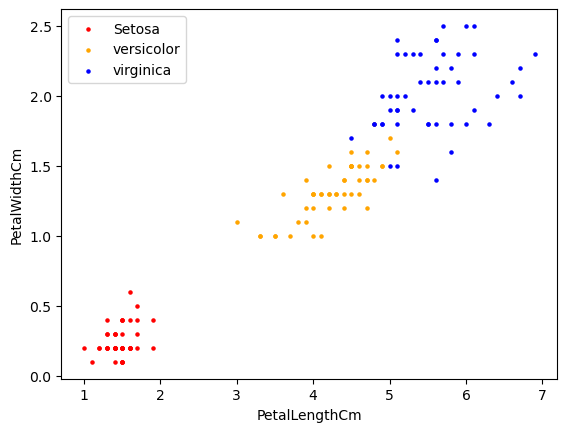

In [24]:
fig = df[df.Species == 'Iris-setosa'].plot.scatter(x = 'PetalLengthCm' , y = 'PetalWidthCm' , color = 'red' , s = 5 , label = 'Setosa')
df[df.Species == 'Iris-versicolor'].plot.scatter(x = 'PetalLengthCm' , y = 'PetalWidthCm' , color = 'orange' , s = 5 , label = 'versicolor', ax = fig)
df[df.Species == 'Iris-virginica'].plot.scatter(x = 'PetalLengthCm' , y = 'PetalWidthCm' , color = 'blue' , s = 5 , label = 'virginica', ax = fig)

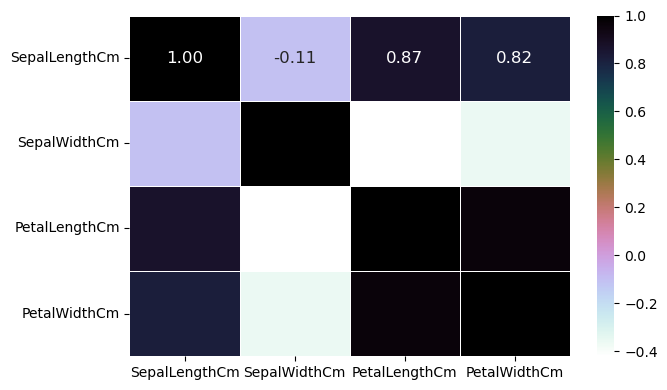

In [44]:

plt.figure(figsize=(7,4)) 
corr = df.drop('Species', axis = 1).corr()
sns.heatmap(corr,annot=True,cmap='cubehelix_r', fmt = '.2f', linewidths=0.5,annot_kws={"size":12})
plt.tight_layout()#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [31]:
df.drop('Species', axis = 1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Since, we see there is high correlation between Petal Length and Petal Width , Petal Length and Sepal Length , Petal Width and Sepal Length. It means
we have only two non- correlated features Petal Width and  Sepal Width. We will first train knn model with all features and then with only two features 
and see the accuracy.

In [55]:
x = df.drop('Species', axis =1)
y = df['Species']
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)


In [58]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_pred = knn.predict(x_test)

In [61]:
#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'\n Accuracy : {accuracy:.4f}')

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix : \n',cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))



 Accuracy : 0.9667

Confusion Matrix : 
 [[ 5  0  0]
 [ 0 11  1]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Now, lets train on only two features

In [66]:
x = df[['PetalWidthCm','SepalWidthCm']]
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'\n Accuracy : {accuracy:.4f}')

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix : \n',cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Accuracy : 0.9667

Confusion Matrix : 
 [[12  0  0]
 [ 0 10  1]
 [ 0  0  7]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



We see, we have the same accuracy even with two features in our hand. Thus, we can only deal with these two features for classification.

Lets now tune the number of neighbors for best accuracy.


Text(0, 0.5, 'Accuracy')

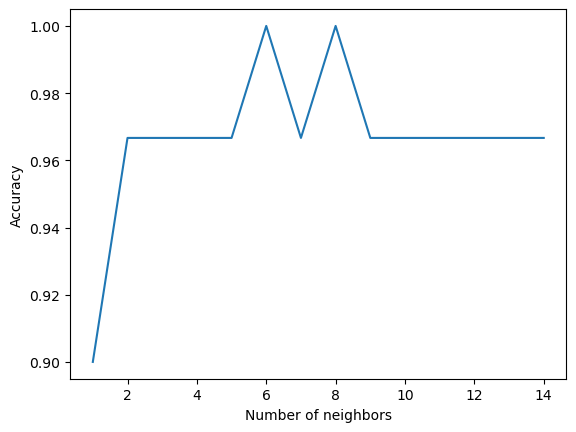

In [89]:
neighbors= range(1,15)
a = []
for n in neighbors :
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = pd.Series(accuracy_score(y_test, y_pred))
    # a = pd.concat([a,accuracy], ignore_index = True)
    a.append(accuracy)
# a = pd.Series(a)    
plt.plot(neighbors,a)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [91]:
#Accuracy with best number of neighbors
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ',accuracy)
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix : \n',cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy =  1.0

Confusion Matrix : 
 [[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



D:\Anaconda\installer\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


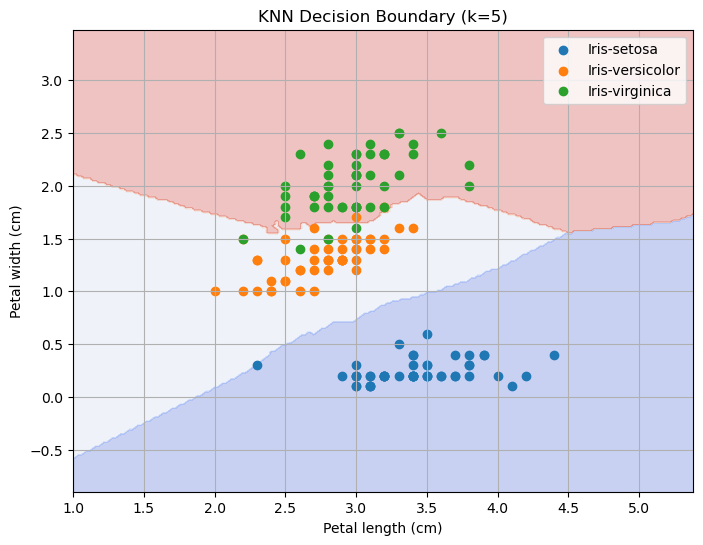

In [118]:
#Visualizing the decision boundaries
X = df.iloc[:, [1,3]]  # Using petal length and sepal width (2D)
y = df['Species']
# Convert string labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2. Fit KNN model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y_encoded)

# 3. Create mesh grid for plotting decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 4. Predict class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z , alpha=0.3, cmap=plt.cm.coolwarm)

# 6. Plot original data points
for i, label in enumerate(le.classes_):
    plt.scatter(X.iloc[y_encoded == i, 0], X.iloc[y_encoded == i, 1], label=label)


plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('KNN Decision Boundary (k=5)')
plt.legend()
plt.grid(True)
plt.show()
